# Neural Network

In [23]:
# Import the Necessary Dependencies

# Data Manipulation
import re ## regular expression operator
import numpy as np
import pandas as pd
import string 


# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Methods and stopwords text processing
import nltk ## natural language toolkit
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer


# Machine Learning Libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import keras 
from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Dropout, Input, Embedding



In [24]:
#Load csv files
DATASET_ENCODING = "ISO-8859-1"
y_train = pd.read_csv('y_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
y_test = pd.read_csv('y_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
X_test = pd.read_csv('X_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
X_train = pd.read_csv('X_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]

X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

y_test = y_test.replace(4,1)
y_train = y_train.replace(4,1)

C:\Users\Thamires\AppData\Local\Temp\ipykernel_11444\2733676361.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('y_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_11444\2733676361.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('y_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_11444\2733676361.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_test = pd.read_csv('X_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_11444\2733676361.py:6: FutureWarning: The 

In [25]:
# # vectorize the text data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=600)
vectorizer.fit(X_train)
print('Vectorizer fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

# # transform the text data into a sparse matrix
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Vectorizer fitted.
No. of feature_words:  600


In [26]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test_vec)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Oranges',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [27]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=600))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               153856    
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 32)               

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
earlystop_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train_vec.toarray(), y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_data=(X_test_vec.toarray(), y_test),
                    callbacks=[earlystop_callback])

# Evaluate the model
loss, accuracy = model.evaluate(X_train_vec.toarray(), y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test_vec.toarray(), y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
1188/1188 [==============================] - 13s 11ms/step - loss: 0.3642 - accuracy: 0.8295 - val_loss: 0.7903 - val_accuracy: 0.7279
Epoch 2/20
1188/1188 [==============================] - 11s 10ms/step - loss: 0.3640 - accuracy: 0.8284 - val_loss: 0.8283 - val_accuracy: 0.6978
Epoch 3/20
1188/1188 [==============================] - 11s 9ms/step - loss: 0.3522 - accuracy: 0.8327 - val_loss: 0.9007 - val_accuracy: 0.7294
Epoch 4/20
1188/1188 [==============================] - 12s 10ms/step - loss: 0.3442 - accuracy: 0.8348 - val_loss: 0.9247 - val_accuracy: 0.7014
Training Accuracy: 0.8929
Testing Accuracy:  0.7014


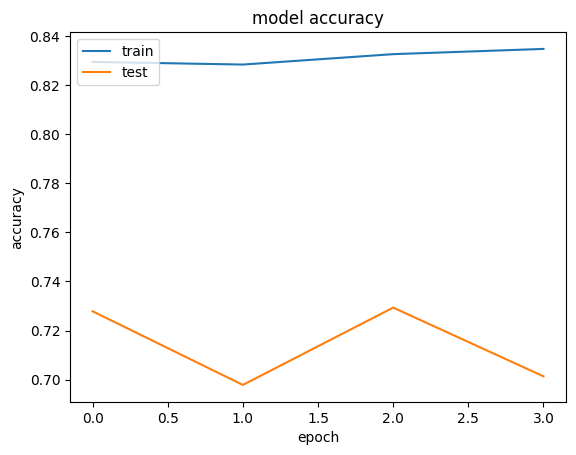

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

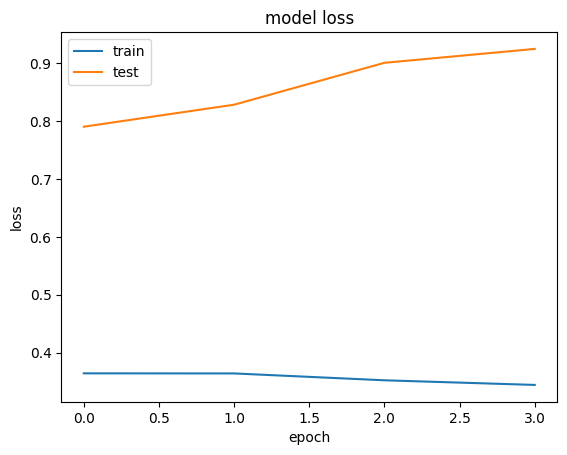

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()